In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

2022-06-19 16:40:49.187293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 16:40:49.187938: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [94]:
ds = pd.read_csv("./data/ICD_original.csv")
md = pd.read_csv("./data/DRUG.csv")

In [95]:
mx = 0
ds_tt = {}
for key in ds.index:
    k = ds.loc[key, "ID"]
    ds.loc[key, "ID"] = list(ds.loc[key, "ID"].replace(".", ""))
    if ds.loc[key, "ID"][0].isalpha():
        ds.loc[key, "ID"][0] = ord(ds.loc[key, "ID"][0])
    ds.loc[key, "ID"] = [int(x) for x in ds.loc[key, "ID"]]
    while len(ds.loc[key, "ID"]) < 5:
        ds.loc[key, "ID"].append(0)
    if len(ds.loc[key, "ID"]) != 5:
        mx = len(ds.loc[key, "ID"])
    ds_tt[k] = ds.loc[key, "ID"]
#     print(ds.loc[key, "ID"])
print(mx)
# print(ds.loc[0, "ID"].size())

0


In [96]:
print(ds_tt)

{'001.0': [0, 0, 1, 0, 0], '001.1': [0, 0, 1, 1, 0], '001.9': [0, 0, 1, 9, 0], '002.0': [0, 0, 2, 0, 0], '002.1': [0, 0, 2, 1, 0], '002.2': [0, 0, 2, 2, 0], '002.3': [0, 0, 2, 3, 0], '002.9': [0, 0, 2, 9, 0], '003.0': [0, 0, 3, 0, 0], '003.1': [0, 0, 3, 1, 0], '003.20': [0, 0, 3, 2, 0], '003.21': [0, 0, 3, 2, 1], '003.22': [0, 0, 3, 2, 2], '003.23': [0, 0, 3, 2, 3], '003.24': [0, 0, 3, 2, 4], '003.29': [0, 0, 3, 2, 9], '003.8': [0, 0, 3, 8, 0], '003.9': [0, 0, 3, 9, 0], '004.0': [0, 0, 4, 0, 0], '004.1': [0, 0, 4, 1, 0], '004.2': [0, 0, 4, 2, 0], '004.3': [0, 0, 4, 3, 0], '004.8': [0, 0, 4, 8, 0], '004.9': [0, 0, 4, 9, 0], '005.0': [0, 0, 5, 0, 0], '005.1': [0, 0, 5, 1, 0], '005.2': [0, 0, 5, 2, 0], '005.3': [0, 0, 5, 3, 0], '005.4': [0, 0, 5, 4, 0], '005.81': [0, 0, 5, 8, 1], '005.89': [0, 0, 5, 8, 9], '005.9': [0, 0, 5, 9, 0], '006.0': [0, 0, 6, 0, 0], '006.1': [0, 0, 6, 1, 0], '006.2': [0, 0, 6, 2, 0], '006.3': [0, 0, 6, 3, 0], '006.4': [0, 0, 6, 4, 0], '006.5': [0, 0, 6, 5, 0], '00

In [97]:
ds_as = pd.read_csv("./data/associate_result.txt",  sep=" ", header=None)
ds_as.columns = ["ds1", "ds2", "d1", "d2", "d"]

In [98]:
print(ds_as)

        ds1     ds2        d1        d2           d
0    070.30  571.40  0.000226  0.172826   30.434465
1    070.32  571.40  0.000111  0.137880   24.280489
2     078.1   692.9  0.000144  0.106867    5.801263
3    078.10   692.9  0.000238  0.105822    5.744501
4     110.4   110.1  0.000515  0.266699   62.509886
..      ...     ...       ...       ...         ...
218   789.0   787.0  0.000231  0.137965   14.278195
219  787.01  789.00  0.000263  0.115586    9.892731
220   884.0   894.0  0.000290  0.196886  102.968667
221   916.0   913.0  0.000330  0.401744  257.484370
222   914.0   916.0  0.000118  0.273929  175.565214

[223 rows x 5 columns]


In [99]:
as_pair = []
label = []
for k in ds_as.index:
    if ds_as.loc[k, "ds1"] not in ds_tt.keys() or ds_as.loc[k, "ds2"] not in ds_tt.keys():
        continue
    ds1 = ds_tt[ds_as.loc[k, "ds1"]]
    ds2 = ds_tt[ds_as.loc[k, "ds2"]]
    label.append(ds_as.loc[k, "d"])
    p = ds1 + ds2
    as_pair.append(p)

In [100]:
print(as_pair)

[[0, 7, 0, 3, 0, 5, 7, 1, 4, 0], [0, 7, 0, 3, 2, 5, 7, 1, 4, 0], [0, 7, 8, 1, 0, 6, 9, 2, 9, 0], [1, 1, 0, 4, 0, 1, 1, 0, 1, 0], [6, 9, 2, 9, 0, 1, 1, 0, 1, 0], [1, 1, 0, 4, 0, 1, 1, 0, 3, 0], [1, 1, 0, 3, 0, 6, 9, 2, 9, 0], [1, 1, 0, 4, 0, 6, 9, 2, 9, 0], [1, 1, 0, 5, 0, 6, 9, 2, 9, 0], [6, 9, 2, 9, 0, 1, 1, 0, 9, 0], [1, 1, 1, 0, 0, 7, 0, 6, 1, 0], [6, 1, 6, 1, 0, 1, 1, 2, 1, 0], [6, 1, 6, 9, 0, 1, 1, 2, 1, 0], [6, 9, 8, 1, 0, 1, 1, 2, 1, 0], [1, 3, 3, 0, 0, 6, 9, 2, 9, 0], [2, 5, 0, 0, 0, 2, 7, 2, 0, 0], [2, 5, 0, 0, 0, 2, 7, 2, 1, 0], [2, 7, 2, 2, 0, 2, 5, 0, 0, 0], [2, 7, 2, 4, 0, 2, 5, 0, 0, 0], [2, 5, 0, 0, 0, 4, 0, 1, 1, 0], [2, 5, 0, 0, 0, 4, 0, 1, 9, 0], [2, 5, 0, 0, 0, 4, 0, 2, 1, 0], [2, 5, 0, 0, 0, 4, 0, 2, 9, 0], [2, 5, 0, 0, 2, 4, 0, 1, 9, 0], [2, 7, 2, 2, 0, 2, 5, 0, 4, 0], [4, 0, 1, 9, 0, 2, 5, 0, 4, 0], [2, 5, 0, 6, 0, 4, 0, 1, 9, 0], [2, 5, 0, 9, 0, 4, 0, 1, 9, 0], [4, 0, 1, 9, 0, 2, 7, 2, 0, 0], [2, 7, 2, 2, 0, 4, 0, 1, 9, 0], [2, 7, 4, 9, 0, 2, 7, 2, 4, 0], [2, 7, 

In [101]:
print(label)

[30.434465382533705, 24.28048873427507, 5.74450051634133, 62.5098856582423, 8.235429563646633, 29.971358945161644, 7.032554318328206, 7.688063027919832, 6.374849780259221, 6.848363211509036, 14.406068418752051, 15.94185990660534, 18.95872955921799, 76.98865964237775, 10.688191609567411, 12.50826640168908, 15.225832259728698, 16.650354089536243, 16.72295964893605, 9.642798156683448, 10.456856133551144, 9.255431396040157, 9.086922331472271, 9.550917831280373, 32.6968912364311, 10.62804109959452, 8.647733815725559, 9.150220939581864, 8.331527290356032, 8.488149379391832, 19.509444651730337, 10.406453487451488, 15.253928311544405, 27.216511360145503, 20.525129035024744, 6.540745960050375, 18.398494425705955, 23.99176718118064, 62.44334972864739, 85.14011363468501, 64.65219471423352, 57.16045816694888, 23.104486577370675, 25.74019552760516, 13.678509012653844, 28.42905467886173, 23.812889653354148, 25.35655440181982, 18.72402688145388, 26.45752431544116, 12.935907897976769, 92.3780842125701

In [102]:
train_set = np.array(as_pair).astype("float32") / 100
print(train_set.shape)
train_set = np.expand_dims(train_set, -1)
train_set = np.expand_dims(train_set, -1)
print(train_set.shape)

(192, 10)
(192, 10, 1, 1)


In [140]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [141]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(10, 1, 1))
x = layers.Conv2D(32, 2, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 2, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 10, 1, 1)]   0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 5, 1, 32)     160         ['input_13[0][0]']               
                                                                                                  
 conv2d_11 (Conv2D)             (None, 3, 1, 64)     8256        ['conv2d_10[0][0]']              
                                                                                                  
 flatten_5 (Flatten)            (None, 192)          0           ['conv2d_11[0][0]']              
                                                                                            

In [142]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(10 * 1 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((10, 1, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=1, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=1, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 2, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_13 (Dense)            (None, 640)               1920      
                                                                 
 reshape_7 (Reshape)         (None, 10, 1, 64)         0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 10, 1, 64)        36928     
 Transpose)                                                      
                                                                 
 conv2d_transpose_22 (Conv2D  (None, 10, 1, 32)        18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_23 (Conv2D  (None, 10, 1, 1)         129 

In [143]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }
    
    def inference(self, batch_size):
        for i in range(batch_size):
            z = tf.random.normal((1, latent_dim))
            reconstruction = vae.decoder.predict(z)

#             print(reconstruction)
#             print(type(reconstruction))
            re = []
            re.append(reconstruction)
        
        return re

In [144]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
history = vae.fit(train_set, epochs=30, batch_size=32)

Epoch 1/30
6/6 [==============================] - 1s 4ms/step - loss: 6.8216 - reconstruction_loss: 6.7505 - kl_loss: 2.0141e-04
Epoch 2/30
6/6 [==============================] - 0s 3ms/step - loss: 6.2091 - reconstruction_loss: 6.0134 - kl_loss: 0.0018
Epoch 3/30
6/6 [==============================] - 0s 3ms/step - loss: 4.8031 - reconstruction_loss: 4.4232 - kl_loss: 0.0073
Epoch 4/30
6/6 [==============================] - 0s 4ms/step - loss: 3.1236 - reconstruction_loss: 2.7768 - kl_loss: 0.0244
Epoch 5/30
6/6 [==============================] - 0s 5ms/step - loss: 1.9843 - reconstruction_loss: 1.8637 - kl_loss: 0.0468
Epoch 6/30
6/6 [==============================] - 0s 4ms/step - loss: 1.9693 - reconstruction_loss: 1.9651 - kl_loss: 0.0333
Epoch 7/30
6/6 [==============================] - 0s 4ms/step - loss: 2.0609 - reconstruction_loss: 2.0072 - kl_loss: 0.0124
Epoch 8/30
6/6 [==============================] - 0s 3ms/step - loss: 1.8320 - reconstruction_loss: 1.8397 - kl_loss: 0.0

In [117]:
recon = vae.inference(1)

1/1 [==============================] - 0s 14ms/step
[[[[0.03883599]]

  [[0.04513319]]

  [[0.02442346]]

  [[0.02915778]]

  [[0.00829349]]

  [[0.0415621 ]]

  [[0.04267424]]

  [[0.02860673]]

  [[0.02809901]]

  [[0.00491274]]]]
<class 'numpy.ndarray'>


In [118]:
recon2 = np.array(recon)
print(type(recon2))
print(recon2.shape)
recon2 = np.array(np.squeeze(recon2))
print(recon2)

ds1_re = 100*recon2[:5]
ds2_re = 100*recon2[5:10]
print(md_re, ds_re)

<class 'numpy.ndarray'>
(1, 1, 10, 1, 1)
[0.03883599 0.04513319 0.02442346 0.02915778 0.00829349 0.0415621
 0.04267424 0.02860673 0.02809901 0.00491274]
[3.9227054 4.665206  2.8560722 2.3974328 1.931223 ] [5.273991  3.4148295 2.9759462 3.5848987 1.1898692]


In [119]:
def dist(table, v):
    mn, idx = float('inf'), 0
    for k in table:
        dis = 0
        for i in range(len(table[k])):
            dis += (float(table[k][i]) - v[i])**2        
        if dis < mn:
            mn = dis
            idx = k
    return mn, idx

In [120]:
ds1_dis, ds1_idx = dist(ds_tt, ds1_re)
ds2_dis, ds2_idx = dist(ds_tt, ds2_re)
print(ds1_dis, ds1_idx)
print(ds2_dis, ds2_idx)

1.1676282068817159 442.3
0.8579690679194165 453.3


In [112]:
ds2 = pd.read_csv("./data/ICD_original.csv")

In [113]:
print(ds2)

          ID                                            NAME_EN  \
0      001.0                     Cholera due to Vibrio cholerae   
1      001.1              Cholera due to Vibrio cholerae el tor   
2      001.9                               Cholera, unspecified   
3      002.0                                      Typhoid fever   
4      002.1                                Paratyphoid fever A   
...      ...                                                ...   
12501  V53.7       Fitting and adjustment of orthopedic devices   
12502  V53.8               Fitting and adjustment of wheelchair   
12503  V53.9    Fitting and adjustment of other and unspecified   
12504  V54.0  Aftercare involving removal of fracture plate ...   
12505  V54.8                         Other orthopedic aftercare   

                   NAME_ZH  
0                霍亂弧菌所致的霍亂  
1               異性霍亂弧菌所致霍亂  
2                       霍亂  
3                       傷寒  
4                    A型副傷寒  
...                  

In [121]:
result = []
for k in ds2.index:
    if ds2.loc[k, "ID"] == ds1_idx:
        result.append([ds1_idx, ds2.loc[k, "NAME_EN"], ds2.loc[k, "NAME_ZH"]])
    if ds2.loc[k, "ID"] == ds2_idx:
        result.append([ds2_idx, ds2.loc[k, "NAME_EN"], ds2.loc[k, "NAME_ZH"]])
print(result[0])
print(result[1])

['442.3', 'Aneurysm of artery of lower extremity', '下肢動脈瘤']
['453.3', 'Embolism and thrombosis of renal vein', '腎靜脈栓塞及血栓']


In [115]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

6/6 [==============================] - 0s 2ms/step


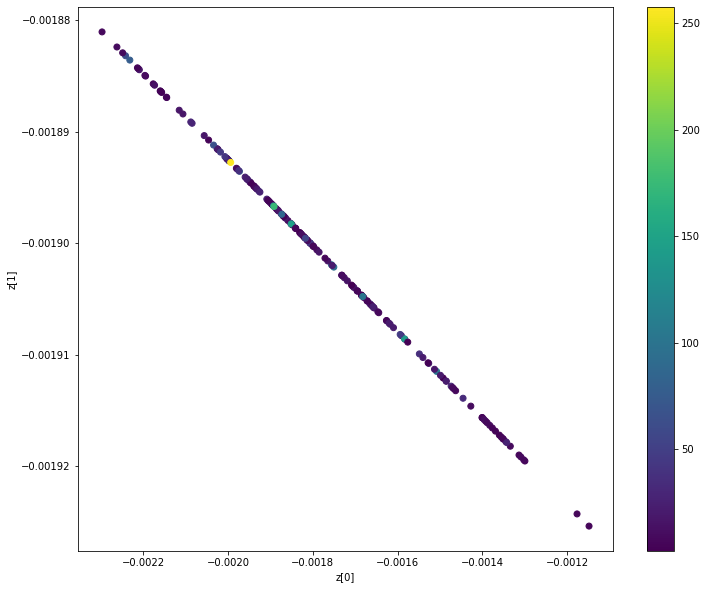

In [116]:
label = np.array(label).astype("float") 
# print(label)
plot_label_clusters(vae, train_set, label)

In [149]:
reconstruction = []
for i in range(20):
    recon = vae.inference(i+1)
    recon2 = np.array(recon)
    recon2 = np.array(np.squeeze(recon2))

    ds1_re = 100*recon2[:5]
    ds2_re = 100*recon2[5:10]
    ds1_dis, ds1_idx = dist(ds_tt, ds1_re)
    ds2_dis, ds2_idx = dist(ds_tt, ds2_re)
    result = []
    for k in ds2.index:
        if ds2.loc[k, "ID"] == ds1_idx:
            result.append([ds1_idx, ds2.loc[k, "NAME_EN"], ds2.loc[k, "NAME_ZH"]])
        if ds2.loc[k, "ID"] == ds2_idx:
            result.append([ds2_idx, ds2.loc[k, "NAME_EN"], ds2.loc[k, "NAME_ZH"]])
    if result[0] != result[1] and (result[0], result[1]) not in reconstruction:        
        reconstruction.append((result[0][2], result[1][2]))

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step


In [150]:
for i in reconstruction:
    print(i)

('急性會厭炎，併阻塞', '髖骨先天性半脫位，單側')
('陰道上部裂傷，住院生產', '先天性股骨弓形畸形')
('切口腹壁疝氣', '骨盆出口狹窄，住院生產')
('橫膈疝氣', '後屈及嵌頓性妊娠子宮，住院生產')
('急性會厭炎，併阻塞', '妊娠子宮之形態或位置及鄰近構造之其他異常，住院生產並提及產後合併症')
('陰道上部裂傷，住院生產', '先天性股骨弓形畸形')
('膽管結石併其他膽囊炎併阻塞', '先天性股骨弓形畸形')
('眼臉(包括眼角)皮膚之原位癌', '老年性腦退化')
('陰道良性腫瘤', '嗜伊紅性腦膜炎')
('陰道上部裂傷，住院生產', '先天性股骨弓形畸形')
('膽管結石併其他膽囊炎併阻塞', '先天性股骨弓形畸形')
('老年性腦退化', '續發性巴金森氏病')
('陰道上部裂傷，住院生產', '先天性股骨弓形畸形')
('急性會厭炎，併阻塞', '臍帶過短，住院生產')
('伴有腦梗塞之多發性及兩側腦前動脈阻塞及狹窄', '下肢動脈瘤')
('膽管結石併急性膽囊炎併阻塞', '先天性股骨弓形畸形')
('嬰兒性腦性麻痺，四肢麻痺，四癱', '伴有腦梗塞之多發性及兩側腦前動脈阻塞及狹窄')
('腎靜脈栓塞及血栓', '骨盆出口狹窄，住院生產')
('眼臉(包括眼角)皮膚之原位癌', '耳及外耳道皮膚之原位癌')
('嬰兒性腦性麻痺，四肢麻痺，四癱', '髂動脈瘤')


In [151]:
re = pd.DataFrame(reconstruction, columns=["dis1", "dis2"])
print(re)

                     dis1                               dis2
0               急性會厭炎，併阻塞                        髖骨先天性半脫位，單側
1             陰道上部裂傷，住院生產                          先天性股骨弓形畸形
2                  切口腹壁疝氣                        骨盆出口狹窄，住院生產
3                    橫膈疝氣                    後屈及嵌頓性妊娠子宮，住院生產
4               急性會厭炎，併阻塞  妊娠子宮之形態或位置及鄰近構造之其他異常，住院生產並提及產後合併症
5             陰道上部裂傷，住院生產                          先天性股骨弓形畸形
6           膽管結石併其他膽囊炎併阻塞                          先天性股骨弓形畸形
7          眼臉(包括眼角)皮膚之原位癌                             老年性腦退化
8                  陰道良性腫瘤                            嗜伊紅性腦膜炎
9             陰道上部裂傷，住院生產                          先天性股骨弓形畸形
10          膽管結石併其他膽囊炎併阻塞                          先天性股骨弓形畸形
11                 老年性腦退化                           續發性巴金森氏病
12            陰道上部裂傷，住院生產                          先天性股骨弓形畸形
13              急性會厭炎，併阻塞                          臍帶過短，住院生產
14  伴有腦梗塞之多發性及兩側腦前動脈阻塞及狹窄                              下肢動脈瘤
15          膽管結石併急性膽囊炎併阻